In [1]:
from fastai.vision.all import *
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
path = r"C:\Users\moham\OneDrive\Documents\ML data\world-data-2023.csv"

data = pd.read_csv(path)

In [4]:
data.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [5]:
useless = ["Abbreviation",""]

In [6]:
data.dtypes


Country                                       object
Density\n(P/Km2)                              object
Abbreviation                                  object
Agricultural Land( %)                         object
Land Area(Km2)                                object
Armed Forces size                             object
Birth Rate                                   float64
Calling Code                                 float64
Capital/Major City                            object
Co2-Emissions                                 object
CPI                                           object
CPI Change (%)                                object
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                             object
Gasoline Price                                object
GDP                                           object
Gross primary education enrollment (%)        object
Gross tertiary education enrollment (%)       

In [7]:
data = data.select_dtypes(exclude=["object"])

<Axes: >

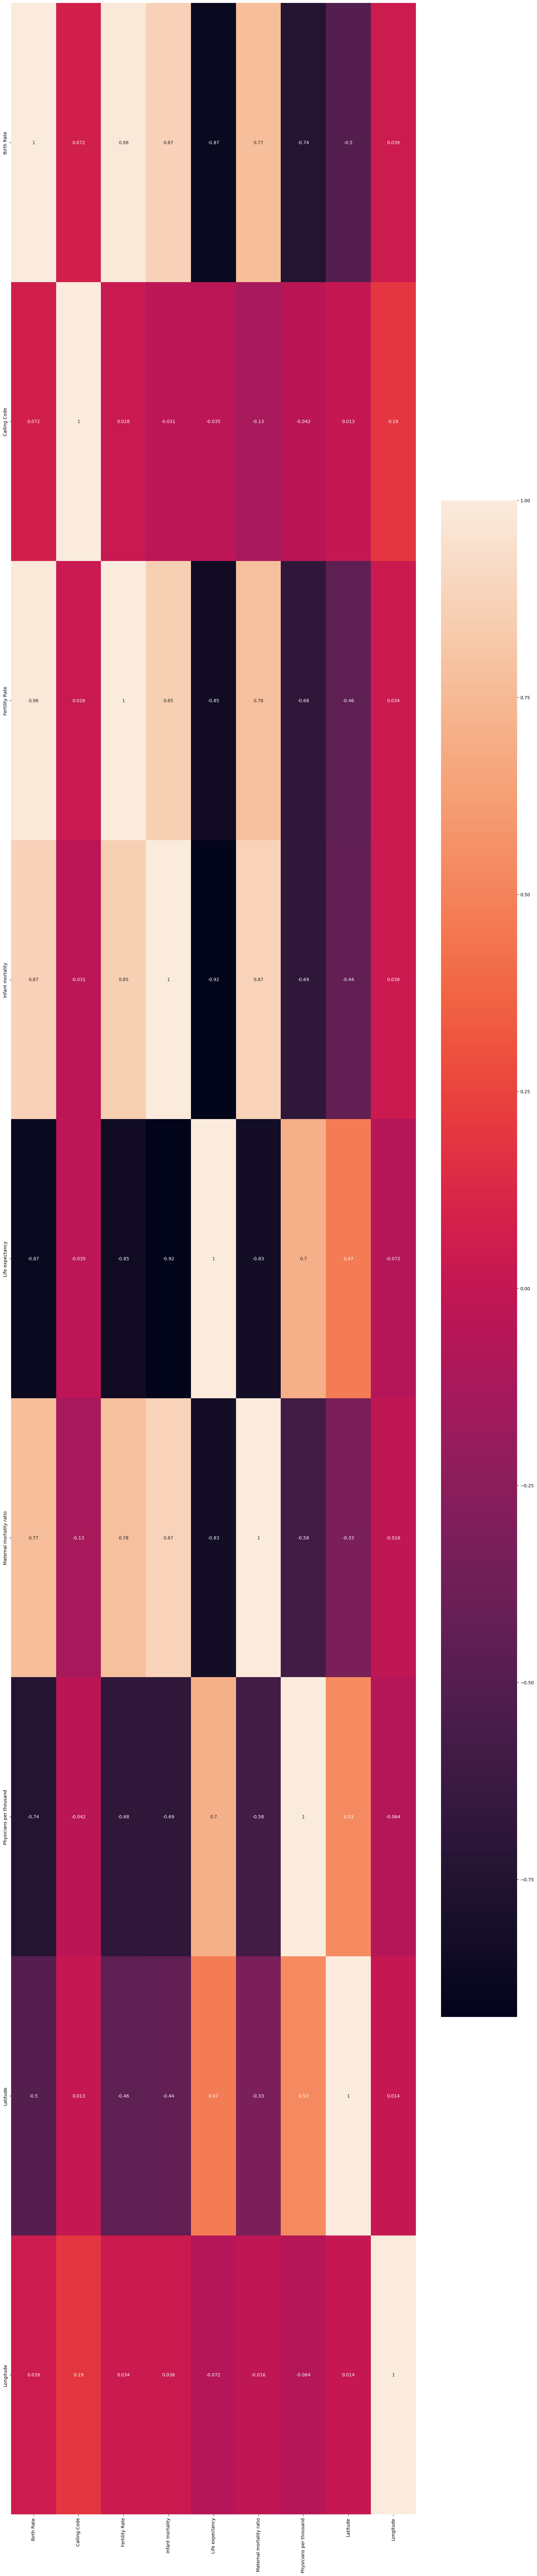

In [8]:

corr = data.corr()


plt.figure(figsize=(20,100))
sns.heatmap(corr,annot=True)

In [9]:
useless = ['Longitude','Latitude','Calling Code']
data.drop(useless,axis=1)
data = data.dropna()

In [10]:
y = data["Life expectancy"]
features = ['Birth Rate','Fertility Rate','Infant mortality','Maternal mortality ratio','Physicians per thousand']
x = data[features]

train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.8,random_state=1)

In [11]:
from sklearn.tree import DecisionTreeRegressor

In [12]:
model = DecisionTreeRegressor(random_state=1)

model.fit(train_x,train_y)



DecisionTreeRegressor(random_state=1)

In [13]:
predictions = model.predict(test_x)

In [14]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test_y,predictions)

2.5180555555555553

In [15]:
predictions

array([82.7, 66.7, 65. , 65. , 78.5, 65. , 66.7, 69.8, 82.7, 72.8, 72.8,
       68.7, 75. , 82.7, 75. , 81.9, 82.9, 54.3, 68.7, 64.1, 68.7, 82.7,
       64.1, 76.1, 80.9, 82.5, 72.8, 65. , 69.8, 75.5, 76.5, 82.7, 82.7,
       72.8, 75.4, 78.5, 72.8, 69.8, 69.8, 75.4, 75.4, 75.4, 70.9, 54.3,
       78.5, 82.7, 61.2, 68.7, 54.3, 68.7, 61.2, 75.5, 78.5, 82.7, 69.8,
       66.7, 80.9, 72.8, 82.7, 76.5, 69.8, 66.7, 65. , 69.8, 75.5, 61.2,
       75.7, 73.1, 82.7, 80.9, 75.7, 72.8, 77.3, 72.8, 66.7, 72.8, 76.5,
       68.7, 81. , 72.8, 72.8, 78.5, 75.7, 75.7, 64.1, 76.5, 82.7, 68.7,
       69.8, 61.2, 66.7, 68.7, 66.7, 66.7, 68.7, 65. , 72.8, 61.2, 77.6,
       72.8, 66.7, 78.5, 78.5, 54.3, 66.7, 65. , 75.4, 65. , 68.7, 64.1,
       61.2, 78.5, 76.1, 65. , 75.7, 64.1, 76.5, 72.8, 69.8, 80.9, 72.8,
       75.4, 66.7, 82.3, 66.7, 76.5, 82.7, 73.1, 75.8, 75.3, 72.8, 72.8,
       68.7, 61.2, 70.9, 82.7, 78.5, 61.2, 75.4, 75.3, 78.5, 78.5, 65. ,
       75.4])

In [23]:
import pickle
filename = r"C:\Users\moham\OneDrive\Documents\abc.pickle"
pickle.dump(model, open(filename, "wb"))

In [17]:
x.head()

,Birth Rate,Fertility Rate,Infant mortality,Maternal mortality ratio,Physicians per thousand
0,32.49,4.47,47.9,638.0,0.28
1,11.78,1.62,7.8,15.0,1.20
2,24.28,3.02,20.1,112.0,1.72
4,40.73,5.52,51.6,241.0,0.21
5,15.33,1.99,5.0,42.0,2.76


In [18]:
test_path = pd.read_csv(r"C:\Users\moham\OneDrive\Documents\ML data\Tests\imp.csv")

In [19]:
pred_2 = model.predict(test_path)

In [20]:
pred_2

array([64.1])